In [1]:
import numpy as np
import scipy.io
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# 2 cluster

In [2]:
mat_data = scipy.io.loadmat('E:/data/Ca_analyzing/Calb1_all_ca/final/decoder/lick_veus_attack.mat')
lick_veus_attack = mat_data['lick_veus_attack']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:/data/Ca_analyzing/Calb1_all_ca/final/decoder/y_decoder_lickattack.mat')
y_decoder_lickattack= mat_data['y_decoder_lickattack']  # 形状 (n_trials,n_neurons, t_timepoints)
# mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/twoeventshuffle.mat')
# twoeventshuffle= mat_data['twoeventshuffle']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:/data/Ca_analyzing/Calb1_all_ca/final/decoder/twoeventshuffle3.mat')
twoeventshuffle= mat_data['twoeventshuffle']  # 形状 (n_trials,n_neurons, t_timepoints)

In [3]:
mask = y_decoder_lickattack[0]!=0
Y=y_decoder_lickattack[0][mask]

X = lick_veus_attack.reshape(2,203,222,1).transpose(1,0,2,3)#*0+np.random.rand(338,2,222,1)# neuron, trials,timepoints
X=X [mask]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

X = twoeventshuffle.reshape(2,203,222,1).transpose(1,0,2,3)#*0+np.random.rand(338,2,222,1)# neuron, trials,timepoints
X=X [mask]
Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# X = twoeventshuffle1.reshape(2,338,222,1).transpose(1,0,2,3)#*0+np.random.rand(338,2,222,1)# neuron, trials,timepoints
# X=X [mask]
# Xs1_train, Xs1_test, Ys1_train, Ys1_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [4]:

o = {'Shuffle 1':[Xs_train, Xs_test, Y_train, Y_test],'True':[X_train, X_test, Y_train, Y_test]}
F1_score = {}
for isss in o:
    F1_score[isss] = []
    for m in range(100):
        X_train, X_test, Y_train, Y_test = o[isss]

    
        model = tf.keras.Sequential([
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(8, (1, 21), strides=(1,5), activation='relu', padding='SAME'),  # 使用 Conv2D
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(16, (1, 21), strides=(1,5), activation='relu', padding='SAME'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D(32, (1, 21 ), strides=(1,5), activation='relu', padding='SAME'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(3, activation='softmax')  # 三分类问题
        ])
        # 编译模型
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, Y_train, epochs=100, batch_size=34, 
                            validation_data=(X_test, Y_test), 
                            verbose=0)
        # 获取预测结果
        y_pred = model.predict(X_test)

        # 对于多分类问题，y_pred 需要转换为类标签
        y_pred_classes = np.argmax(y_pred, axis=1)  # 获取预测的类标签

        # 计算 F1-score（宏观平均 F1-score）
        f1=f1_score(Y_test, y_pred_classes, average='weighted')  # 可以选择 'macro' 或 'weighted'
        # F1_score[isss].append(np.sum((Y_test==np.argmax(model.predict(X_test),axis=-1))*(Y_test>0))/np.sum(Y_test>0))
        F1_score[isss].append(f1)

1/1 [==============================] - 0s 97ms/step


{'bodies': [<matplotlib.collections.PolyCollection at 0x1fd66fa85e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1fd66fa8d60>,
 'cmins': <matplotlib.collections.LineCollection at 0x1fd58bc0b50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1fd58bc0340>}

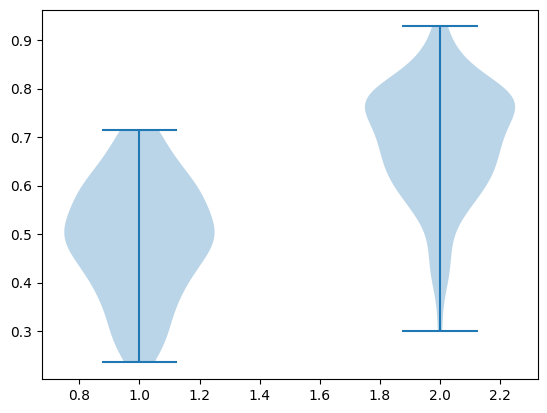

In [5]:
plt.violinplot(list(F1_score.values()))

In [6]:
import pandas as pd
F1_score_shuffle= pd.DataFrame(F1_score['Shuffle 1'], columns=['shuffle'])
F1_score_shuffle.to_csv('E:/data/Ca_analyzing/Calb1_all_ca/final/decoder/lick_veus_attack_shuffle.csv', index=False)
F1_score_true= pd.DataFrame(F1_score['True'], columns=['True'])
F1_score_true.to_csv('E:/data/Ca_analyzing/Calb1_all_ca/final/decoder/lick_veus_attack_True.csv', index=False)

# 1 cluster

In [11]:
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/y_decoder_lick.mat')
Y_decoder_lick = mat_data['y_decoder_lick']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/lick_av_dff.mat')
lick_av_dff= mat_data['lick_av_dff']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/lick_shuffle_av_dff.mat')
lick_shuffle_av_dff= mat_data['lick_shuffle_av_dff']  # 形状 (n_trials,n_neurons, t_timepoints)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# 预处理数据
X = lick_av_dff.reshape(338, 222, 1)  # (batch_size, time_steps, channels)
Y = np.array(Y_decoder_lick[0])  # 二分类标签

# 处理类别不均衡
class_weights = {0: 0.55, 1: 5.17}  # 0 类占比高，1 类占比低

repeat_times = 100
F1_scores, decoding_accuracies = [], []

for i in range(repeat_times):
    print(f"Training iteration {i+1}/{repeat_times}...")

    # 重新划分训练集和测试集
    x_train, x_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.1, stratify=Y, random_state=i  # 保证每次划分一致
    )

    # 重新构建模型
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(8, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(16, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3), #防止过拟合
        tf.keras.layers.Conv1D(32, 20, activation='relu', padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # 单分类选择类型

    # 训练模型，加入 EarlyStopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        x_train, Y_train, epochs=100, batch_size=34,
        validation_data=(x_test, Y_test), shuffle=True,
        callbacks=[early_stop], class_weight=class_weights,
        verbose=0  # 关闭详细日志，提高运行效率
    )

    # 计算 F1-score
    y_pred = (model.predict(x_test, verbose=0) > 0.5).astype(int)

    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    val_acc = history.history['val_accuracy'][-1] if 'val_accuracy' in history.history else 0  # 防止EarlyStopping过早停止

    decoding_accuracies.append(val_acc)
    F1_scores.append(f1)

    print(f"Iteration {i+1} - F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Val Acc: {val_acc:.4f}")

# 计算平均 F1-score 和 Accuracy
print(f"\nAverage F1-score: {np.mean(F1_scores):.4f} ± {np.std(F1_scores):.4f}")
print(f"Average Validation Accuracy: {np.mean(decoding_accuracies):.4f} ± {np.std(decoding_accuracies):.4f}")


Training iteration 1/100...
Iteration 1 - F1-score: 0.5000, Precision: 0.4000, Recall: 0.6667, Val Acc: 0.8529
Training iteration 2/100...
Iteration 2 - F1-score: 0.8571, Precision: 0.7500, Recall: 1.0000, Val Acc: 0.9118
Training iteration 3/100...
Iteration 3 - F1-score: 0.5000, Precision: 0.4000, Recall: 0.6667, Val Acc: 0.8824
Training iteration 4/100...
Iteration 4 - F1-score: 0.8000, Precision: 1.0000, Recall: 0.6667, Val Acc: 0.9412
Training iteration 5/100...
Iteration 5 - F1-score: 0.6667, Precision: 0.6667, Recall: 0.6667, Val Acc: 0.9118
Training iteration 6/100...
Iteration 6 - F1-score: 0.4000, Precision: 0.5000, Recall: 0.3333, Val Acc: 0.8824
Training iteration 7/100...
Iteration 7 - F1-score: 0.5714, Precision: 0.5000, Recall: 0.6667, Val Acc: 0.8824
Training iteration 8/100...
Iteration 8 - F1-score: 0.5000, Precision: 0.4000, Recall: 0.6667, Val Acc: 0.8824
Training iteration 9/100...
Iteration 9 - F1-score: 0.8571, Precision: 0.7500, Recall: 1.0000, Val Acc: 0.9412
T

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# 预处理数据
X = lick_shuffle_av_dff.reshape(338, 222, 1)  # (batch_size, time_steps, channels)
Y = np.array(Y_decoder_lick[0])  # 二分类标签

# 处理类别不均衡
class_weights = {0: 0.55, 1: 5.17}  # 0 类占比高，1 类占比低

repeat_times = 100
F1_scores, decoding_accuracies = [], []

for i in range(repeat_times):
    print(f"Training iteration {i+1}/{repeat_times}...")

    # 重新划分训练集和测试集
    x_train, x_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.1, stratify=Y, random_state=i  # 保证每次划分一致
    )

    # 重新构建模型
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(8, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(16, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(32, 20, activation='relu', padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型，加入 EarlyStopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        x_train, Y_train, epochs=100, batch_size=34,
        validation_data=(x_test, Y_test), shuffle=True,
        callbacks=[early_stop], class_weight=class_weights,
        verbose=0  # 关闭详细日志，提高运行效率
    )

    # 计算 F1-score
    y_pred = (model.predict(x_test, verbose=0) > 0.5).astype(int)
    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    val_acc = history.history['val_accuracy'][-1] if 'val_accuracy' in history.history else 0  # 防止EarlyStopping过早停止

    decoding_accuracies.append(val_acc)
    F1_scores.append(f1)

    print(f"Iteration {i+1} - F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Val Acc: {val_acc:.4f}")

# 计算平均 F1-score 和 Accuracy
print(f"\nAverage F1-score: {np.mean(F1_scores):.4f} ± {np.std(F1_scores):.4f}")
print(f"Average Validation Accuracy: {np.mean(decoding_accuracies):.4f} ± {np.std(decoding_accuracies):.4f}")


Training iteration 1/100...
Iteration 1 - F1-score: 0.3077, Precision: 0.2000, Recall: 0.6667, Val Acc: 0.7647
Training iteration 2/100...
Iteration 2 - F1-score: 0.2222, Precision: 0.1667, Recall: 0.3333, Val Acc: 0.6471
Training iteration 3/100...
Iteration 3 - F1-score: 0.4444, Precision: 0.3333, Recall: 0.6667, Val Acc: 0.7647
Training iteration 4/100...
Iteration 4 - F1-score: 0.0000, Precision: 0.0000, Recall: 0.0000, Val Acc: 0.8824
Training iteration 5/100...
Iteration 5 - F1-score: 0.1667, Precision: 0.1111, Recall: 0.3333, Val Acc: 0.7353
Training iteration 6/100...
Iteration 6 - F1-score: 0.5000, Precision: 0.4000, Recall: 0.6667, Val Acc: 0.7647
Training iteration 7/100...
Iteration 7 - F1-score: 0.0000, Precision: 0.0000, Recall: 0.0000, Val Acc: 0.7353
Training iteration 8/100...
Iteration 8 - F1-score: 0.2000, Precision: 0.1429, Recall: 0.3333, Val Acc: 0.7941
Training iteration 9/100...
Iteration 9 - F1-score: 0.4000, Precision: 0.2857, Recall: 0.6667, Val Acc: 0.8235
T

In [22]:
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/y_decoder_attack.mat')
y_decoder_attack = mat_data['y_decoder_attack']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/attack_av_dff.mat')
attack_av_dff= mat_data['attack_av_dff']  # 形状 (n_trials,n_neurons, t_timepoints)
mat_data = scipy.io.loadmat('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/attack_shuffle_av_dff.mat')
attack_shuffle_av_dff= mat_data['attack_shuffle_av_dff']  # 形状 (n_trials,n_neurons, t_timepoints)

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# 预处理数据
X = attack_av_dff.reshape(338, 222, 1)  # (batch_size, time_steps, channels)
Y = np.array(y_decoder_attack[0])  # 二分类标签

# 处理类别不均衡
class_weights = {0: 0.55, 1: 5.17}  # 0 类占比高，1 类占比低

repeat_times = 100
F1_scores, decoding_accuracies = [], []

for i in range(repeat_times):
    print(f"Training iteration {i+1}/{repeat_times}...")

    # 重新划分训练集和测试集
    x_train, x_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.1, stratify=Y, random_state=i  # 保证每次划分一致
    )

    # 重新构建模型
    model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(8, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(16, 20, activation='relu', padding='SAME'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(32, 20, activation='relu', padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 训练模型，加入 EarlyStopping
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        x_train, Y_train, epochs=100, batch_size=34,
        validation_data=(x_test, Y_test), shuffle=True,
        callbacks=[early_stop], class_weight=class_weights,
        verbose=0  # 关闭详细日志，提高运行效率
    )

    # 计算 F1-score
    y_pred = (model.predict(x_test, verbose=0) > 0.5).astype(int)

    f1 = f1_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    val_acc = history.history['val_accuracy'][-1] if 'val_accuracy' in history.history else 0  # 防止EarlyStopping过早停止

    decoding_accuracies.append(val_acc)
    F1_scores.append(f1)

    print(f"Iteration {i+1} - F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Val Acc: {val_acc:.4f}")

# 计算平均 F1-score 和 Accuracy
print(f"\nAverage F1-score: {np.mean(F1_scores):.4f} ± {np.std(F1_scores):.4f}")
print(f"Average Validation Accuracy: {np.mean(decoding_accuracies):.4f} ± {np.std(decoding_accuracies):.4f}")

Training iteration 1/100...
Iteration 1 - F1-score: 0.0000, Precision: 0.0000, Recall: 0.0000, Val Acc: 0.8824
Training iteration 2/100...
Iteration 2 - F1-score: 0.5000, Precision: 0.5000, Recall: 0.5000, Val Acc: 0.8824
Training iteration 3/100...
Iteration 3 - F1-score: 0.8889, Precision: 0.8000, Recall: 1.0000, Val Acc: 0.9412
Training iteration 4/100...
Iteration 4 - F1-score: 0.5455, Precision: 0.4286, Recall: 0.7500, Val Acc: 0.8235
Training iteration 5/100...
Iteration 5 - F1-score: 0.6667, Precision: 0.6000, Recall: 0.7500, Val Acc: 0.9412
Training iteration 6/100...
Iteration 6 - F1-score: 0.6667, Precision: 0.5000, Recall: 1.0000, Val Acc: 0.8529
Training iteration 7/100...
Iteration 7 - F1-score: 0.8571, Precision: 1.0000, Recall: 0.7500, Val Acc: 0.8824
Training iteration 8/100...
Iteration 8 - F1-score: 0.8000, Precision: 0.6667, Recall: 1.0000, Val Acc: 0.8529
Training iteration 9/100...
Iteration 9 - F1-score: 0.7273, Precision: 0.5714, Recall: 1.0000, Val Acc: 0.8824
T

In [24]:
import pandas as pd
# F1_score= pd.DataFrame(F1_scores, columns=['lickdecoding'])
# F1_score.to_csv('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder\lickdecoding_F1.csv', index=False)
# F1_score= pd.DataFrame(F1_scores, columns=['lickshuffledecoding'])
# F1_score.to_csv('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder\lickdeshuffle_F1.csv', index=False)
# F1_score= pd.DataFrame(F1_scores, columns=['attackdecoding'])
# F1_score.to_csv('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/attackcoding_F1.csv', index=False)
F1_score= pd.DataFrame(F1_scores, columns=['attackshuffledecoding'])
F1_score.to_csv('E:\data\Ca_analyzing\Calb1_all_ca/for PCA\decoder/attackshuffle_F1.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
A = [(j,i) for i,j in zip(X,Y)]
A.sort(key=lambda x: x[0])
fig = plt.figure(figsize=(1,20))
B = []
c = 0
for i in A:
    if i[0]==1:
        m = np.random.rand()<1
    else:
        m = np.random.rand()<0.1
    if m:
        _norm = i[1]/np.max(i[1])*0.5+0.5
        plt.plot(_norm+c*2,color='#555555')
        plt.axhline(c*2)
        B.append(i[0])
        c += 1
plt.yticks([i*2+1 for i in range(len(B))],B)
plt.ylim(0,c*2)
plt.show()